<center>
<h1>Accessing THREDDS using Siphon</h1>
<br>
<h3>25 July 2017
<br>
<br>
Ryan May (@dopplershift)
<br><br>
UCAR/Unidata<br>
</h3>
</center>


# What is Siphon?

* Python library for remote data access
* Focus on atmospheric and oceanic data sources
* Bulk of features focused on THREDDS

## Installing on Azure

In [1]:
!conda install --name root siphon -y -c conda-forge

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda3_410:
#
siphon                    0.5.0                    py35_0    conda-forge


## Functionality
* THREDDS catalog parser
* NetCDF Subset Service (NCSS) client
* CDM Remote client
* Radar Query Service client

# THREDDS?
* Server for data collections in various formats
* Powered by netCDF-Java
* Provides catalogs of data with metadata information
* Programmatic access to data with various services

* Metadata services
  - ISO
  - UDDC
  - NCML

* Download service (HTTPServer)

- Subsetting
  * WMS/WCS
  * OPeNDAP and CDMRemote
  * NetCDF Subset Service (NCSS)

## THREDDS Demo
http://thredds.ucar.edu

# Siphon for THREDDS
- Let's start by parsing a THREDDS catalog

In [2]:
from siphon.catalog import TDSCatalog
top_cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog.xml')

That takes care of download the catalog, parsing the XML, and doing useful things. From here we can do things like look at all the catalog references...

In [3]:
for ref in top_cat.catalog_refs:
    print(ref)

Forecast Model Data
Forecast Products and Analyses
Observation Data
Radar Data
Satellite Data
Unidata case studies


So we can see what's available at the top level. We can also extract exactly what we're looking for using the name of the item:

In [4]:
ref = top_cat.catalog_refs['Forecast Model Data']
ref.href

'http://thredds.ucar.edu/thredds/idd/forecastModels.xml'

Or we can just access by position:

In [5]:
ref = top_cat.catalog_refs[0]
ref.href

'http://thredds.ucar.edu/thredds/idd/forecastModels.xml'

and then resolve that catalog reference to get a new catalog.

In [6]:
new_cat = ref.follow()
list(new_cat.catalog_refs)

['GEFS Members - Analysis',
 'GEFS Members - Forecasts',
 'GEFS Derived Forecast Products',
 'GFS Quarter Degree Analysis',
 'GFS Quarter Degree Forecast',
 'GFS Half Degree Analysis',
 'GFS Half Degree Forecast',
 'GFS One Degree Analysis',
 'GFS One Degree Forecast',
 'GFS Global 2.5 Degree',
 'GFS Global 1.0 Degree (NOAAPORT)',
 'GFS Pacific 40km',
 'GFS Pacific 20km',
 'GFS Puerto Rico Half Degree',
 'GFS Puerto Rico Quarter Degree',
 'GFS CONUS 80km',
 'GFS CONUS 20km',
 'GFS CONUS 95km',
 'GFS Alaska 20km',
 'GSD HRRR CONUS 3km surface',
 'GSD HRRR CONUS 3km wrfprs',
 'NCEP HRRR CONUS 2.5km Analysis',
 'NCEP HRRR CONUS 2.5km',
 'NAM Alaska 11km',
 'NAM Alaska 45km from NOAAPORT',
 'NAM Alaska 45km from CONDUIT',
 'NAM Alaska 95km',
 'NAM CONUS 12km from NOAAPORT',
 'NAM CONUS 12km from CONDUIT',
 'NAM CONUS 20km',
 'NAM CONUS 40km',
 'NAM CONUS 80km',
 'NAM Polar 90km',
 'NAM Fireweather Nested',
 'Rapid Refresh CONUS 13km',
 'Rapid Refresh CONUS 20km',
 'Rapid Refresh CONUS 40km

We can do this one more time, but instead of `catalog_refs`, we look at the `datasets` attribute to see the list of datasets available.

In [7]:
gfs_cat = new_cat.catalog_refs[4].follow()
list(gfs_cat.datasets)

['Full Collection (Reference / Forecast Time) Dataset',
 'Best GFS Quarter Degree Forecast Time Series',
 'Latest Collection for GFS Quarter Degree Forecast']

`datasets` works just like `catalog_refs` in providing both name- and position-based access. Here we can access the first dataset in the catalog:

In [8]:
ds = gfs_cat.datasets[0]
ds.name

'Full Collection (Reference / Forecast Time) Dataset'

For catalogs that have a latest" automatically updated, dataset, the attribute `latest` is available:

In [9]:
ds = gfs_cat.latest
ds.name

'GFS_Global_0p25deg_20170725_0600.grib2'

Let's get a new catalog directly to some satellite data:
http://thredds.ucar.edu/thredds/idd/satellite.html

In [10]:
sat_cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/'
                     'satellite/3.9/WEST-CONUS_4km/current/catalog.xml')
list(sat_cat.datasets)

['WEST-CONUS_4km_3.9_20170725_1456.gini',
 'WEST-CONUS_4km_3.9_20170725_1454.gini',
 'WEST-CONUS_4km_3.9_20170725_1452.gini',
 'WEST-CONUS_4km_3.9_20170725_1445.gini',
 'WEST-CONUS_4km_3.9_20170725_1440.gini',
 'WEST-CONUS_4km_3.9_20170725_1430.gini',
 'WEST-CONUS_4km_3.9_20170725_1422.gini',
 'WEST-CONUS_4km_3.9_20170725_1415.gini',
 'WEST-CONUS_4km_3.9_20170725_1410.gini',
 'WEST-CONUS_4km_3.9_20170725_1400.gini',
 'WEST-CONUS_4km_3.9_20170725_1356.gini',
 'WEST-CONUS_4km_3.9_20170725_1354.gini',
 'WEST-CONUS_4km_3.9_20170725_1352.gini',
 'WEST-CONUS_4km_3.9_20170725_1345.gini',
 'WEST-CONUS_4km_3.9_20170725_1340.gini',
 'WEST-CONUS_4km_3.9_20170725_1330.gini',
 'WEST-CONUS_4km_3.9_20170725_1322.gini',
 'WEST-CONUS_4km_3.9_20170725_1315.gini',
 'WEST-CONUS_4km_3.9_20170725_1310.gini',
 'WEST-CONUS_4km_3.9_20170725_1300.gini',
 'WEST-CONUS_4km_3.9_20170725_1256.gini',
 'WEST-CONUS_4km_3.9_20170725_1254.gini',
 'WEST-CONUS_4km_3.9_20170725_1252.gini',
 'WEST-CONUS_4km_3.9_20170725_1245

Instead of accessing the dataset by name or position, we can also ask the collection of datasets to parse the filenames as datetimes and find:
- those within a range
- those closest to a time

In [11]:
from datetime import datetime, timedelta

In [12]:
# Look for all data within the last hour
now = datetime.utcnow()
l = sat_cat.datasets.filter_time_range(start=now - timedelta(hours=1),
                                       end=now)
[ds.name for ds in l]

['WEST-CONUS_4km_3.9_20170725_1456.gini',
 'WEST-CONUS_4km_3.9_20170725_1454.gini',
 'WEST-CONUS_4km_3.9_20170725_1452.gini',
 'WEST-CONUS_4km_3.9_20170725_1445.gini',
 'WEST-CONUS_4km_3.9_20170725_1440.gini',
 'WEST-CONUS_4km_3.9_20170725_1430.gini',
 'WEST-CONUS_4km_3.9_20170725_1422.gini',
 'WEST-CONUS_4km_3.9_20170725_1415.gini',
 'WEST-CONUS_4km_3.9_20170725_1410.gini']

In this case, the filter resulted in a list of `Dataset` handles. If we look instead for the nearest to a time, we get a single `Dataset` handle:

In [13]:
# Look for data from an hour ago
dt = datetime.utcnow() - timedelta(hours=1)
ds = sat_cat.datasets.filter_time_nearest(dt)
ds.name

'WEST-CONUS_4km_3.9_20170725_1410.gini'

We can use the dataset handle to look at the available access methods:

In [14]:
ds.access_urls

{'CdmRemote': 'http://thredds.ucar.edu/thredds/cdmremote/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'HTTPServer': 'http://thredds.ucar.edu/thredds/fileServer/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'ISO': 'http://thredds.ucar.edu/thredds/iso/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'NCML': 'http://thredds.ucar.edu/thredds/ncml/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'NetcdfSubset': 'http://thredds.ucar.edu/thredds/ncss/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'OPENDAP': 'http://thredds.ucar.edu/thredds/dodsC/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'UDDC': 'http://thredds.ucar.edu/thredds/uddc/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9_20170725_1410.gini',
 'WCS': 'http://thredds.ucar.edu/thredds/wcs/satellite/3.9/WEST-CONUS_4km/current/WEST-CONUS_4km_3.9

## Putting it together

How would we use this? Let's say we wanted to write a script to download the latest global run of the Wave Watch 3 model (WW3), and plot the output. So far, we have enough to get to the proper dataset:

In [15]:
top_cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog.xml')
models_cat = top_cat.catalog_refs[0].follow()
ww3_cat = models_cat.catalog_refs['Wave Watch III Global'].follow()
latest_ww3 = ww3_cat.latest
print(latest_ww3.name)
print(latest_ww3.access_urls)

WW3_Global_20170725_0600.grib2
{'WCS': 'http://thredds.ucar.edu/thredds/wcs/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'WMS': 'http://thredds.ucar.edu/thredds/wms/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'NCML': 'http://thredds.ucar.edu/thredds/ncml/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'UDDC': 'http://thredds.ucar.edu/thredds/uddc/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'OPENDAP': 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'ISO': 'http://thredds.ucar.edu/thredds/iso/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'HTTPServer': 'http://thredds.ucar.edu/thredds/fileServer/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'NetcdfSubset': 'http://thredds.ucar.edu/thredds/ncss/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2', 'CdmRemote': 'http://thredds.ucar.edu/thredds/cdmremote/grib/NCEP/WW3/Global/WW3_Global_20170725_0600.grib2'}


## Exercise #1
1. Using Siphon, navigate from the top-level THREDDS catalog at https://nomads.ncdc.noaa.gov/thredds/catalog.xml to the 3-hour NARR-A data from January 5th, 2014 (or another product or time of interest)
1. Using Siphon, compare the available access methods (on http://thredds.ucar.edu) for:
  - The "Best GFS Quarter Degree Forecast Time Series" (under "Forecast Model Data")
  - A data file of "NEXRAD Level II Radar WSR-88D" (under "Radar Data")

In [16]:
# Start here
top_cat = TDSCatalog('https://nomads.ncdc.noaa.gov/thredds/catalog.xml')

# Accessing data using Siphon
Accessing catalogs is only part of the story; Siphon is much more useful if you're trying to access/download datasets.

For instance going back to our satellite data from earlier:

In [17]:
# Same as before
cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/'
                'satellite/3.9/WEST-CONUS_4km/current/'
                'catalog.xml')
ds = cat.datasets.filter_time_nearest(datetime.utcnow()
                                      - timedelta(hours=1))

We can ask Siphon to download the file locally:

In [18]:
ds.download('data.gini')

Or better yet, get a file-like object that lets us `read` from the file as if it were local:

In [19]:
fobj = ds.remote_open()
data = fobj.read()

This is handy if you have Python code to read a particular format.

It's also possible to get access to the file through services that provide netCDF4-like access, but for the remote file. This access allows downloading information only for variables of interest, or for (index-based) subsets of that data:

In [20]:
nc = ds.remote_access()

By default this uses CDMRemote (if available), but it's also possible to ask for OPeNDAP (using netCDF4-python).

From here we can see what variables are available:

In [21]:
list(nc.variables)

['time', 'IR', 'x', 'y', 'LambertConformal']

Or get a subset of the values:

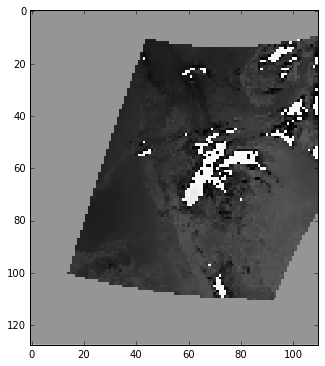

In [22]:
# Plot small sample image
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nc.variables['IR'][0, ::10, ::10], cmap='Greys', interpolation='none')

## Exercise #2
Using `remote_access`, plot a subset of data from the High Resolution Rapid Refresh (http://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km/catalog.html). Pick any of the available collections or individual model runs.

For some datasets, subset support is availble:
- Defaults to netCDF Subset Service (NCSS)
- Allows specifying latitude, longitude, time, and variables
- NCSS downloads a netCDF file

To use NCSS, we can call `subset` and get a client.

In [23]:
ds = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/'
                'grib/NCEP/GFS/Global_0p25deg/catalog.xml').datasets[1]
ncss = ds.subset()
ncss.variables

{'5-Wave_Geopotential_Height_isobaric',
 'Absolute_vorticity_isobaric',
 'Albedo_surface_Mixed_intervals_Average',
 'Apparent_temperature_height_above_ground',
 'Best_4_layer_Lifted_Index_surface',
 'Categorical_Freezing_Rain_surface_Mixed_intervals_Average',
 'Categorical_Ice_Pellets_surface_Mixed_intervals_Average',
 'Categorical_Rain_surface_Mixed_intervals_Average',
 'Categorical_Snow_surface_Mixed_intervals_Average',
 'Cloud_Work_Function_entire_atmosphere_single_layer_Mixed_intervals_Average',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_water_entire_atmosphere_single_layer',
 'Convective_Precipitation_Rate_surface_Mixed_intervals_Average',
 'Convective_available_potential_energy_pressure_difference_layer',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition_pressure_difference_layer',
 'Convective_inhibition_surface',
 'Convective_precipitation_surface_Mixed_intervals_Accumulation',
 'Dewpoint_temperature_height_above_ground',
 'Downward_Long-Wave_Radp_Flux_surf

With this client we can set up a query for the data we want. In this case we request the next 24 hours of forecast:

In [24]:
query = ncss.query()
query.lonlat_point(lon=-105, lat=40)
now = datetime.utcnow()
query.time_range(now, now + timedelta(days=1))
query.variables('Temperature_surface')
query.accept('netcdf4')

var=Temperature_surface&time_end=2017-07-26T15%3A09%3A32.533117&time_start=2017-07-25T15%3A09%3A32.533117&latitude=40&longitude=-105&accept=netcdf4

From here, we need to get the data, which will return it as an already opened netCDF4 object.

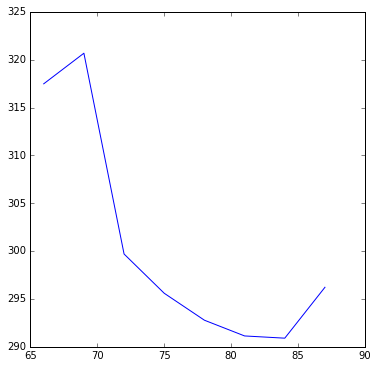

In [25]:
nc = ncss.get_data(query)
temp_data = nc.variables['Temperature_surface'][:]
times = nc.variables['time'][:]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(times, temp_data)

We can also request the data for a particular time for a region of interest:

In [26]:
query = ncss.query()
query.lonlat_box(east=-80, west=-90, south=35, north=45)
query.time(now + timedelta(days=1))
query.variables('Temperature_surface')
query.accept('netcdf4')
nc = ncss.get_data(query)

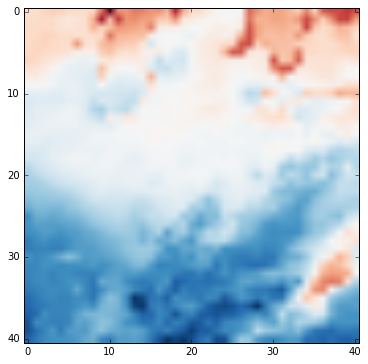

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nc.variables['Temperature_surface'][0], cmap='RdBu')

## Exercise #3
- Use `subset` to download a subset of data from one of:
  - http://thredds.ucar.edu/thredds/catalog/grib/NCEP/WW3/Global/catalog.html
  - http://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km/catalog.html
- Pick either a time-series or a 2D subset
- Plot using either `plot` or `imshow`

## A full Example

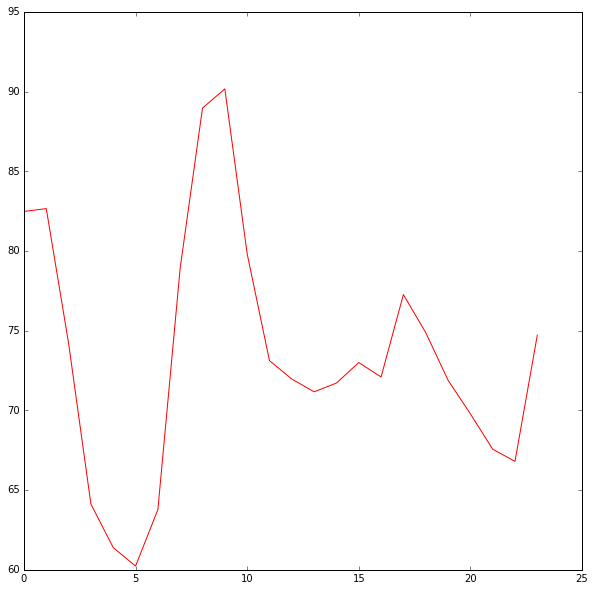

In [28]:
# Get the dataset handle
top_cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog.xml')
models_cat = top_cat.catalog_refs[0].follow()
gfs_cat = models_cat.catalog_refs['GFS Quarter Degree Forecast'].follow()
latest_gfs = gfs_cat.latest

# Download a subset using NCSS
now = datetime.utcnow()
ncss = latest_gfs.subset()
query = ncss.query().lonlat_point(lon=-86.50, lat=39.17)
query.time_range(now, now + timedelta(days=3)).accept('netcdf4')
query.variables('Temperature_surface')
nc = ncss.get_data(query)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
temp_f = 1.8 * (nc.variables['Temperature_surface'][:] - 273.15) + 32
ax.plot(temp_f, color='r')

# Future plans for Siphon
- Add curated list of servers
- Support for access to meteorological uppear air archives
- Support for TDS 5.0 CDM Remote Feature service
- Search catalogs using CSW

## Resources
- Siphon docs: https://unidata.github.io/siphon
- Unidata Python Workshop: https://unidata.github.com/unidata-python-workshop
- Unidata Python Gallery: https://unidata.github.com/python-gallery